In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Reshape,Flatten
from tensorflow.keras.models import Sequential,Model


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

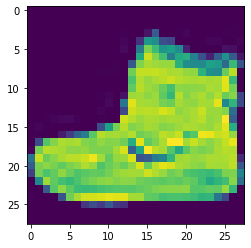

In [ ]:
y_train[0]
plt.imshow(X_train[0])

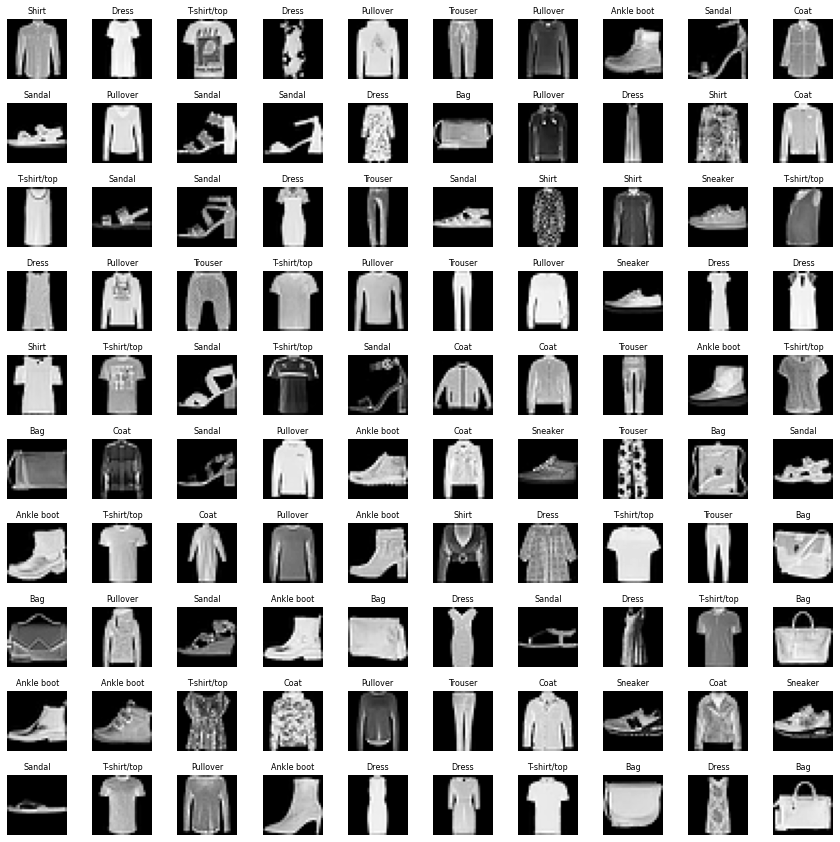

In [ ]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
width = 10
height = 10
fig,axes = plt.subplots(height,width,figsize = (15,15))
# print(axes.shape)
# print(fig)
axes = axes.ravel() #change from 10*10 matrix to 100 vector
for i in np.arange(0,width*height):
  index =np.random.randint(0,59999)
  axes[i].imshow(X_train[index] ,cmap='gray')
  axes[i].set_title(classes[y_train[index]],fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape ,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train =X_train.reshape(len(X_train),28,28,1)
X_test =X_test.reshape(len(X_test),28,28,1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
autoencoder = Sequential()

#encoder
autoencoder.add(Conv2D(filters =16,kernel_size = (3,3),activation = 'relu',padding='same',input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))
autoencoder.add(Conv2D(filters=8,kernel_size =(3,3),activation = 'relu',padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2),padding='same'))
autoencoder.add(Conv2D(filters = 8,kernel_size = (3,3),activation = 'relu',padding='same',strides = (2,2)))
autoencoder.add(Flatten())

#decoder
autoencoder.add(Reshape((4,4,8)))
autoencoder.add(Conv2D(filters = 8,kernel_size=(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 8,kernel_size=(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 1,kernel_size=(3,3),activation='sigmoid',padding='same'))

autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_10 (Flatten)        (None, 128)             

In [ ]:
  autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 6ms/step - loss: 0.3134 - accuracy: 0.5039
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2872 - accuracy: 0.5064
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2828 - accuracy: 0.5070
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2806 - accuracy: 0.5073
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2790 - accuracy: 0.5075
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2779 - accuracy: 0.5076
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2769 - accuracy: 0.5078
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2762 - accuracy: 0.5079
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2753 - accuracy: 0.5081
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
#output = (input - filter +1) /stride
#input = (28,28,1)
#filter size = 3
#output = (28-3+1)/1 = 26 (above it is 28 because i added the padding as same)

#upsampling2D: (16,16,8)
#filtersize:3
#number of filers :!6
#output =(16-3+1)/1 = 14 --> (14,14,16)

In [ ]:
encoder = Model(inputs = autoencoder.input ,outputs =autoencoder.get_layer('flatten_10').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                             

In [ ]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
coded_test_images.shape

(10000, 128)

In [ ]:
coded_test_images[0]

array([0.        , 0.5707798 , 0.6182629 , 0.2756749 , 0.5608078 ,
       0.        , 0.49586558, 0.5691037 , 0.04320176, 0.70346045,
       0.25028664, 0.3384003 , 0.31876254, 0.        , 0.2951429 ,
       0.77231693, 0.2237139 , 0.8672432 , 0.3314766 , 0.41163608,
       0.18777338, 0.12728111, 0.22033378, 0.83924824, 0.2870844 ,
       0.75428617, 0.4780782 , 0.37075287, 0.01892616, 0.05807754,
       0.25495535, 0.9190391 , 0.10918303, 0.70195544, 0.549518  ,
       0.34687856, 0.5260846 , 0.22067417, 0.3303867 , 0.8572595 ,
       1.3062773 , 1.5754297 , 0.3056476 , 0.668608  , 0.7244192 ,
       0.2485789 , 0.41965908, 1.0353854 , 2.616025  , 2.9250526 ,
       0.        , 2.4897761 , 0.        , 1.888164  , 1.9022927 ,
       1.2183368 , 1.581862  , 2.2113895 , 0.        , 1.8506172 ,
       0.        , 2.139749  , 1.7356793 , 1.6643984 , 1.3766955 ,
       1.3958557 , 1.6979594 , 1.8629827 , 0.90346754, 0.73936373,
       2.035152  , 1.0010986 , 2.2731726 , 2.0651712 , 0.     

In [ ]:
decoded_test_images = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


AttributeError: ignored

In [ ]:
decoded_test_images.shape

(10000, 28, 28, 1)

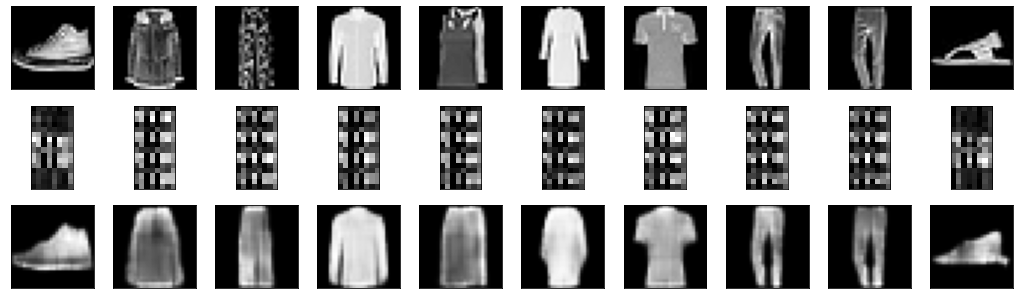

In [ ]:
n_images= 10
test_images=np.random.randint(0,X_test.shape[0],size=n_images)
plt.figure(figsize=(18,18))
for i,image_index in enumerate(test_images):
  # print(i,image_index)
  ax=plt.subplot(10,10,i+1)
  plt.imshow(X_test[image_index].reshape(28,28),cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #coded images
  ax=plt.subplot(10,10,i+1+n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8),cmap ='gray')
  plt.xticks(())
  plt.yticks(())

  #decodedimages
  ax=plt.subplot(10,10,i+1+n_images*2) #last parameter is changed to avoid the error of duplicate indes
  plt.imshow(decoded_test_images[image_index].reshape(28,28),cmap ='gray')
  plt.xticks(())
  plt.yticks(())